# Introduction

***Importing our main libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight

# Dataset Overview




- ECG heartbeat classification can be used in real-time for arrhythmia detection. Arrhythmias are abnormal heart rhythms that can be dangerous. By classifying heartbeats in real-time, doctors can monitor patients for arrhythmias and intervene quickly if necessary.
- For instance, a device worn by a patient could use ECG heartbeat classification to monitor their heart rhythm for signs of arrhythmia. If an arrhythmia is detected, the device could alert the patient or their doctor, and also for driver detection of fatigue using ecg sensor or smartwatch.

In [2]:
df =pd.read_csv('ptbdb.csv', header=None)

In [3]:
df[187]=df[187].astype(float)
equilibre = df[187].value_counts()
print(equilibre)

187
1.0    10506
0.0     4046
Name: count, dtype: int64


In [4]:

# Get the unique values in the last column
class_labels = df[187].unique() #the unique() to count the number one time only

# Assign meaningful names to the class labels based on domain knowledge
class_names = {
    0: "Normal beats",
    1: "Abnormal beats",
    
}

# Print class labels with their assigned names
for label in class_labels:
    print(f"Class label {label}: {class_names[label]}")

Class label 0.0: Normal beats
Class label 1.0: Abnormal beats


# Exploratory Data Analysis 

***let's show the training data to know what it contains how many rows & columns***

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


***See if there's missing values in the dataset, by seeing the NaN and average mean but all of the columns have a numbers because its contains of reads in every row at the end of column numbers it captures the electrical activity of your heart over time, ECG datasets are typically large and formatted with multiple leads (channels) capturing electrical activity from different angles of the heart.***

In [6]:
# Explore dataset
print("Columns and their NaN percentages:")
null_col = df.isna().mean() * 100
print(null_col)

Columns and their NaN percentages:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
Length: 188, dtype: float64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB


In [8]:

num = df[187].value_counts() #how many values are there for each class
print(num)

187
1.0    10506
0.0     4046
Name: count, dtype: int64


***Get a pie chart that explain every class with its perecentages in the training dataset***

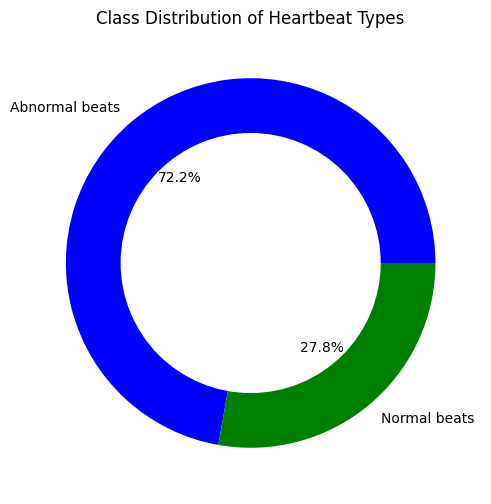

In [9]:
class_counts = df[187].value_counts() 

# Map numeric labels to names for the pie chart
labels = [class_names[i] for i in class_counts.index]

# Pie chart
plt.figure(figsize=(10, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')

plt.pie(
    class_counts, 
    labels=labels, 
    colors=['blue', 'green'], 
    autopct='%1.1f%%', 
    textprops={'color': 'black'}
)

# Add the white center
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Class Distribution of Heartbeat Types")
plt.show()

In [10]:

# Assuming the target column is the last column
target_column_index = 187

#class_labels = df[target_column_index].unique()
#print("My classes:", class_labels)
# Update features and target variable
X = df.drop(columns=[187])
y = df[187]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create separate DataFrames for training and validation with target included
train_df = X_train.copy()
train_df[target_column_index] = y_train

test_df = X_test.copy()
test_df[target_column_index] = y_test



In [11]:
train_df[target_column_index]= train_df[target_column_index].astype(float)
equilibre = train_df[target_column_index].value_counts()
print(equilibre)

187
1.0    7363
0.0    2823
Name: count, dtype: int64


In [12]:
test_df[target_column_index]= test_df[target_column_index].astype(float)
equilibre = test_df[target_column_index].value_counts()
print(equilibre)

187
1.0    3143
0.0    1223
Name: count, dtype: int64


***Resample the training data to 1000 samples each class to make it more balance to work in it, because the normal beats class contains much more samples than the others and that could led for imbalance that in the model for an overfitting***

In [13]:
from sklearn.utils import resample
# Step 2: Resample the minority classes in the training set
# Identify each class in the training set
df_1 = train_df[train_df[target_column_index] == 1.0]
df_0 = train_df[train_df[target_column_index] == 0.0]


# Upsample each class to 20000 instances
df_0_upsample = resample(df_0, n_samples=10000, replace=True, random_state=123)
df_1_upsample = resample(df_1, n_samples=10000, replace=True, random_state=123)


train_df = pd.concat([df_0_upsample, df_1_upsample])


***Pie Chart shows the training dataset after resampling***

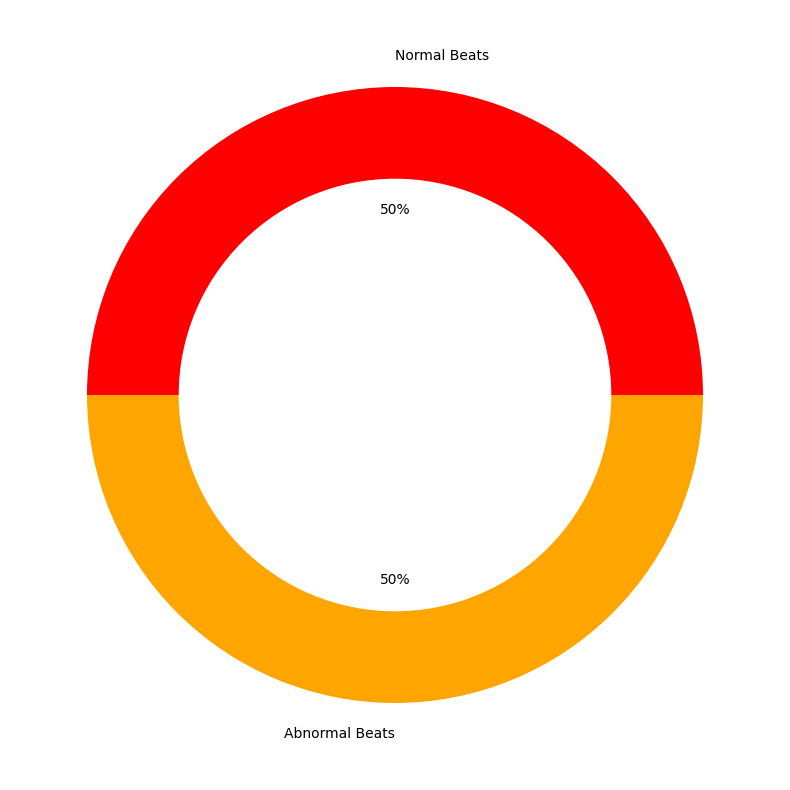

In [14]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Abnormal Beats'], autopct = '%0.0f%%', colors = ['red','orange'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



***Resample the validation data to 1000 samples each class to make it more balance to work in it, because the normal beats class contains much more samples than the others and that could led for imbalance that in the model for an overfitting***

***Pie Chart shows the testing dataset after resampling***

In [15]:
train_df.shape



(20000, 188)

In [16]:
test_df.shape

(4366, 188)

***Spliting the training dataset into train, test for using them in machine and deep learning models, Use standard scaler function to normalize our dataset***

In [17]:
from sklearn.preprocessing import StandardScaler
# Split the training data into training and test sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
# Transform the valid data using the fitted scaler
X_test_normalized = scaler.transform(X_test)
# Transform the test data using the fitted scaler
X_validation_normalized = scaler.transform(X_validation)

print("Before Normalization:")
print(X_train.head(5))

print("After Normalization:")
print(X_train_normalized[:, 5])



Before Normalization:
            0         1         2         3         4         5         6    \
2324   1.000000  0.709827  0.229748  0.130810  0.081009  0.116866  0.111554   
6813   0.986404  0.667979  0.368157  0.167800  0.102683  0.047227  0.015742   
13373  0.892086  0.952038  0.899281  0.598721  0.328537  0.260592  0.179856   
10880  1.000000  0.564259  0.226616  0.185551  0.101141  0.032700  0.019772   
8822   0.972603  0.814542  0.656480  0.399368  0.361433  0.224447  0.064278   

            7         8         9    ...  177  178  179  180  181  182  183  \
2324   0.106906  0.096282  0.115538  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6813   0.007871  0.018962  0.028623  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13373  0.207034  0.187050  0.111910  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10880  0.016730  0.007605  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8822   0.051633  0.060063  0.036881  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
2324 

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization, ReLU
from tensorflow.keras.callbacks import EarlyStopping
# Create the CNN model
CNN_model = Sequential()

# Add the first convolutional layer
CNN_model.add(Conv1D(32, kernel_size=5, padding='same', activation='relu', input_shape=(187, 1)))
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))

# Add the second convolutional layer 
CNN_model.add(Conv1D(16, kernel_size=3, padding='same', activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))

# Add the third convolutional layer
CNN_model.add(Conv1D(16, kernel_size=5, padding='same', activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))

# Add the fourth convolutional layer
CNN_model.add(Conv1D(16, kernel_size=3, padding='same', activation='relu'))
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))

# Max pooling layer
CNN_model.add(MaxPooling1D(pool_size=2, strides=2))

# Flatten the output from the convolutional layers
CNN_model.add(Flatten())

# Add the dense layers
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(2, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Print the model summary
CNN_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)                   │ (None, 187, 32)             │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 93, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 93, 16)              │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 46, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 46, 16)              │           1,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 23, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 23, 16)              │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_18 (MaxPooling1D)      │ (None, 11, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_19 (MaxPooling1D)      │ (None, 5, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,482 (25.32 KB)

 Trainable params: 6,482 (25.32 KB)

 Non-trainable params: 0 (0.00 B)

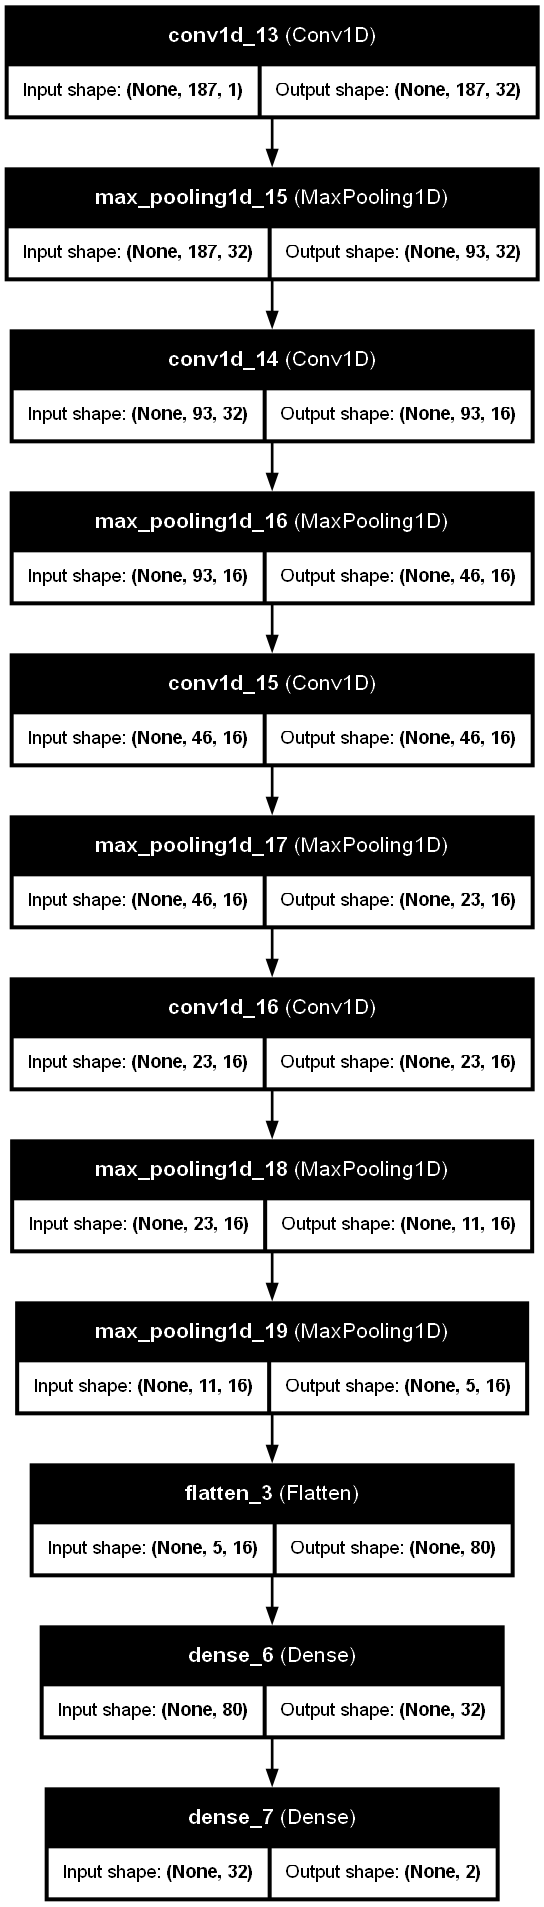

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(CNN_model,to_file='model.png',show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [32]:
# Fit the CNN model
history_CNN = CNN_model.fit(X_train_normalized.reshape(-1, 187, 1), y_train,
                    epochs=150,  # number of epochs
                    batch_size=64,  # batch size(how much data is feeded to the the model at a time)
                    validation_data=(X_validation_normalized, y_validation),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
loss, accuracy = CNN_model.evaluate(X_validation_normalized, y_validation)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9701 - loss: 0.0928 - val_accuracy: 0.9715 - val_loss: 0.0824
Epoch 2/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9830 - loss: 0.0511 - val_accuracy: 0.9735 - val_loss: 0.0706
Epoch 3/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9838 - loss: 0.0472 - val_accuracy: 0.9769 - val_loss: 0.0644
Epoch 4/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9789 - val_loss: 0.0603
Epoch 5/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9890 - loss: 0.0363 - val_accuracy: 0.9804 - val_loss: 0.0578
Epoch 6/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9878 - loss: 0.0393 - val_accuracy: 0.9804 - val_loss: 0.0567
Epoch 7/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9888 - loss: 0.0339 - val_accuracy: 0.9823 - val_loss: 0.0539
Epoch 8/150
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9912 - loss: 0.0312 - 

In [34]:

loss_test, accuracy_test = CNN_model.evaluate(X_test_normalized, y_test)
print("test Loss:", loss_test)
print("test Accuracy:", accuracy_test)

137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9850 - loss: 0.0776
test Loss: 0.05957327038049698
test Accuracy: 0.9862574338912964


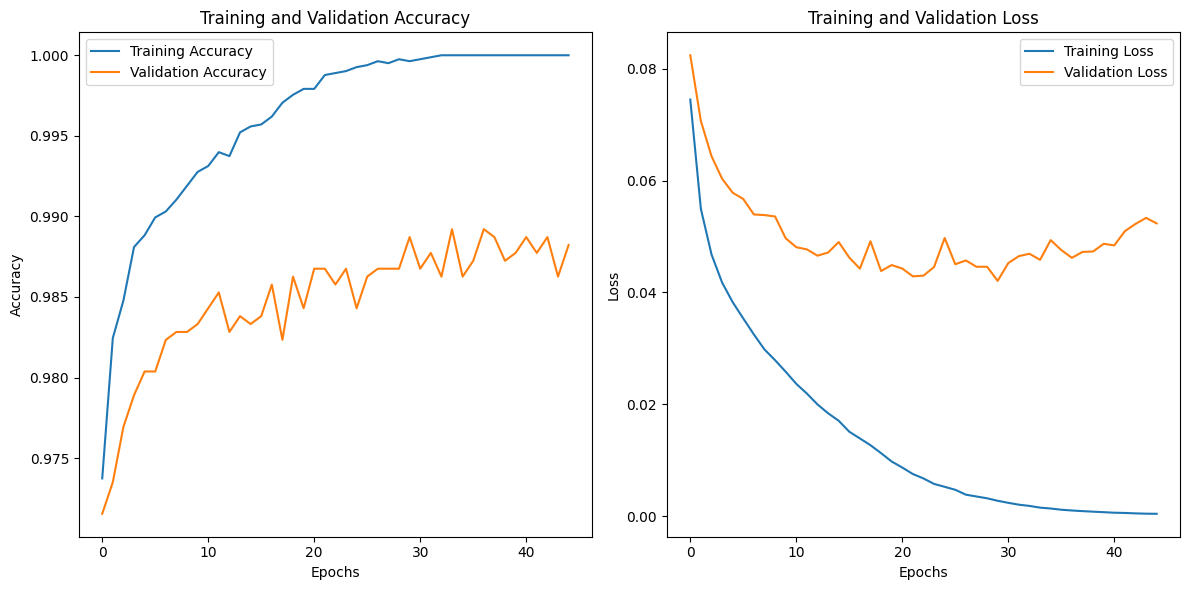

In [35]:

import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_CNN.history['loss'], label='Training Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


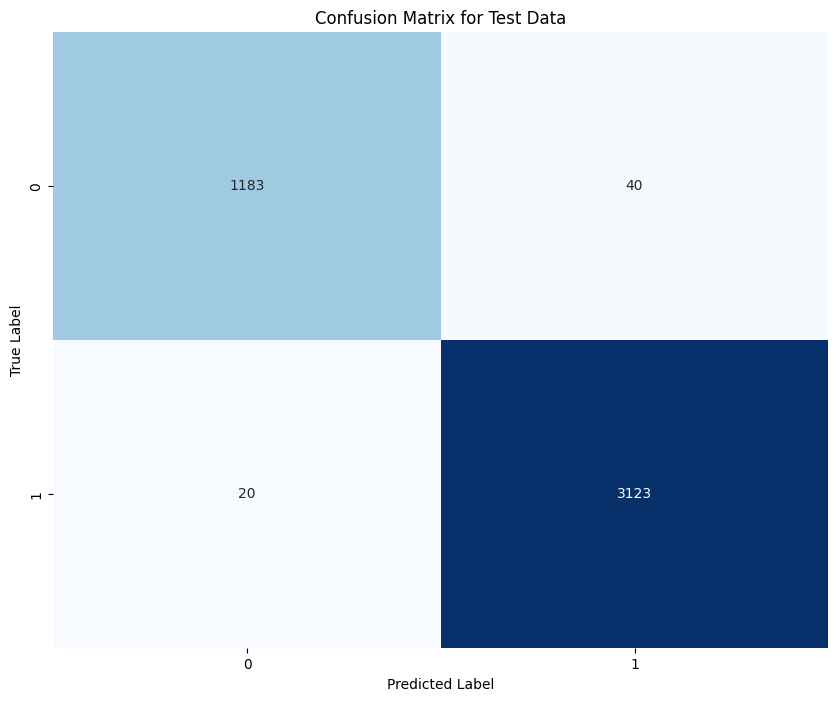

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_test_prob = CNN_model.predict(X_test_normalized)
y_pred_test_classes = np.argmax(y_pred_test_prob, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder with updated argument
encoder = OneHotEncoder(sparse_output=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot = encoder.fit_transform(y_test_reshaped)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [37]:
# Get the model weights
x = CNN_model.get_weights()

# Define layer names for clarity
layer_names = ['Conv1D Layer 1', 'Conv1D Layer 2', 'Conv1D Layer 3', 'Conv1D Layer 4', 'Dense Layer 1', 'Dense Layer 2']

# Iterate through the layers and their corresponding weights and biases
for i, layer in enumerate(layer_names):
    weights = x[2*i]
    biases = x[2*i+1]  
    
    # Save weights
    with open(f"{layer}_weights.txt", "w+") as f:
        print(f"{layer} Weights:\n")
        print(f"Weights shape: {weights.shape}\n")
        if len(weights.shape) == 3:  # For Conv1D layers, the weights are 3D
            for h in range(weights.shape[0]):  # Iterate over kernel size
                for w in range(weights.shape[1]):  # Iterate over input channels
                    for n in range(weights.shape[2]):  # Iterate over output channels(filters number)
                        f.write(f"{weights[h, w, n]} ")
                    f.write("\n")
        elif len(weights.shape) == 2:  # For Dense layers, the weights are 2D
            for row in weights:
                f.write(" ".join([str(w) for w in row]) + "\n")
        f.write("\n")
    
    # Save biases
    with open(f"{layer}_biases.txt", "w+") as f:
        print(f"{layer} Biases:\n")
        print(f"Biases shape: {biases.shape}\n")
        for bias in biases:
            f.write(f"{bias}\n")

    print(f"Saved {layer} weights and biases to text files.")


Conv1D Layer 1 Weights:

Weights shape: (5, 1, 32)

Conv1D Layer 1 Biases:

Biases shape: (32,)

Saved Conv1D Layer 1 weights and biases to text files.
Conv1D Layer 2 Weights:

Weights shape: (3, 32, 16)

Conv1D Layer 2 Biases:

Biases shape: (16,)

Saved Conv1D Layer 2 weights and biases to text files.
Conv1D Layer 3 Weights:

Weights shape: (5, 16, 16)

Conv1D Layer 3 Biases:

Biases shape: (16,)

Saved Conv1D Layer 3 weights and biases to text files.
Conv1D Layer 4 Weights:

Weights shape: (3, 16, 16)

Conv1D Layer 4 Biases:

Biases shape: (16,)

Saved Conv1D Layer 4 weights and biases to text files.
Dense Layer 1 Weights:

Weights shape: (80, 32)

Dense Layer 1 Biases:

Biases shape: (32,)

Saved Dense Layer 1 weights and biases to text files.
Dense Layer 2 Weights:

Weights shape: (32, 2)

Dense Layer 2 Biases:

Biases shape: (2,)

Saved Dense Layer 2 weights and biases to text files.


In [38]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import tensorflow as tf



# Recreate the model architecture exactly as it was during training
new_model = Sequential()

# Add the first convolutional layer
new_model.add(Conv1D(32, kernel_size=5, padding='same', activation='relu', input_shape=(187, 1)))
new_model.add(MaxPooling1D(pool_size=2, strides=2))

# Add the second convolutional layer 
new_model.add(Conv1D(16, kernel_size=3, padding='same', activation='relu'))
new_model.add(MaxPooling1D(pool_size=2, strides=2))

# Add the third convolutional layer
new_model.add(Conv1D(16, kernel_size=5, padding='same', activation='relu'))
new_model.add(MaxPooling1D(pool_size=2, strides=2))

# Add the fourth convolutional layer
new_model.add(Conv1D(16, kernel_size=3, padding='same', activation='relu'))
new_model.add(MaxPooling1D(pool_size=2, strides=2))

# Max pooling layer
new_model.add(MaxPooling1D(pool_size=2, strides=2))

# Flatten the output from the convolutional layers
new_model.add(Flatten())

# Add the dense layers
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(2, activation='softmax'))

# Compile the model
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



import numpy as np

# Function to load and reshape weights from a text file
def load_weights_from_txt(file_name, shape):
    with open(file_name, "r") as f:
        data = f.readlines()
    # Convert the lines into a numpy array
    weights = np.array([float(w) for line in data for w in line.strip().split()])
    # Reshape weights to match the expected shape of the layer() 
    weights = weights.reshape(shape)
    return weights

# Function to load biases from text file
def load_bias_from_txt(file_name, shape):
    with open(file_name, "r") as f:
        data = f.readlines()
    # Convert the lines into a numpy array
    biases = np.array([float(b) for line in data for b in line.strip().split()])
    
    # Reshape biases to match the expected shape of the layer
    biases = biases.reshape(shape)
    return biases

# Now load weights and biases for each layer
new_model.layers[0].set_weights([load_weights_from_txt('Conv1D Layer 1_weights.txt', (5, 1, 32)), load_bias_from_txt('Conv1D Layer 1_biases.txt', (32,))])  # Conv1D 1st layer
new_model.layers[2].set_weights([load_weights_from_txt('Conv1D Layer 2_weights.txt', (3, 32, 16)), load_bias_from_txt('Conv1D Layer 2_biases.txt', (16,))])  # Conv1D 2nd layer
new_model.layers[4].set_weights([load_weights_from_txt('Conv1D Layer 3_weights.txt', (5, 16, 16)), load_bias_from_txt('Conv1D Layer 3_biases.txt', (16,))])  # Conv1D 3rd layer
new_model.layers[6].set_weights([load_weights_from_txt('Conv1D Layer 4_weights.txt', (3, 16, 16)), load_bias_from_txt('Conv1D Layer 4_biases.txt', (16,))])  # Conv1D 4th layer
new_model.layers[10].set_weights([load_weights_from_txt('Dense Layer 1_weights.txt', (80, 32)), load_bias_from_txt('Dense Layer 1_biases.txt', (32,))])  # Dense 1st layer
new_model.layers[11].set_weights([load_weights_from_txt('Dense Layer 2_weights.txt', (32, 2)), load_bias_from_txt('Dense Layer 2_biases.txt', (2,))])  # Dense 2nd layer

# Now the model is reconstructed with the loaded weights

# Test the model (use your test data)
test_loss, test_accuracy = new_model.evaluate(X_test_normalized, y_test)

# Or make predictions
predictions = new_model.predict(X_test_normalized)

# Print test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9850 - loss: 0.0776
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Test Loss: 0.05957327038049698
Test Accuracy: 0.9862574338912964
